<a href="https://colab.research.google.com/github/arunab-DS/Agentic-AI-Generative-AI-ML-DA-FSDS_CODES_EXPERTISE/blob/main/CNN_Happy_Sad_faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
!nvidia-smi

Sat Feb  7 05:55:06 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   64C    P0             31W /   70W |    1146MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [22]:
from tensorflow import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [23]:
img= image.load_img('/content/drive/MyDrive/Colab Notebooks/CNN-Happy or sad/training/not happy/Photo on 07-02-26 at 11.21 AM.jpg')

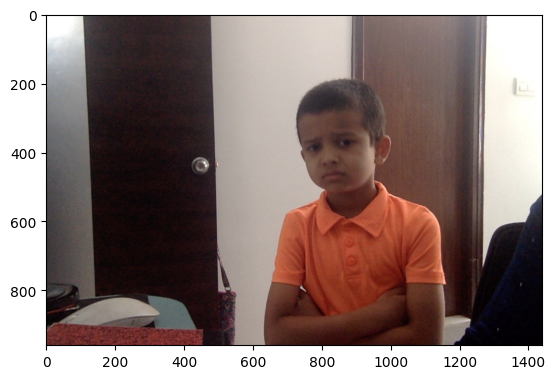

In [24]:
plt.imshow(img)

In [25]:
i1=cv2.imread('/content/drive/MyDrive/Colab Notebooks/CNN-Happy or sad/training/not happy/Photo on 07-02-26 at 11.21 AM.jpg')
i1

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 38,  47, 111],
        [ 33,  42, 106],
        [ 34,  40, 105],
        ...,
        [  2,   0,   3],
        [  3,   0,   4],
        [  5,   1,   6]],

       [[ 41,  50, 117],
        [ 36,  44, 111],
        [ 36,  42, 109],
        ...,
        [  2,   0,   3],
        [  3,   0,   4],
        [  5,   1,   6]],

       [[ 36,  45, 112],
        [ 33,  42, 109],
        [ 37,  43, 110],
        ...,
        [  2,   0,   3],
        [  3,   0,   4],
        [  5,   1,   6]]

In [26]:
i1.shape

(960, 1440, 3)

In [27]:
train=ImageDataGenerator(rescale=1/200)
validation=ImageDataGenerator(rescale=1/200)
#resize image using 200 200 pixels

In [28]:
train_dataset=train.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN-Happy or sad/training',
                                        target_size=(200,200),
                                        batch_size=32,
                                        class_mode='binary')
validation_dataset=validation.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN-Happy or sad/training',
                                                  target_size=(200,200),
                                                  batch_size=32,
                                                  class_mode='binary')


Found 41 images belonging to 2 classes.
Found 41 images belonging to 2 classes.


In [29]:
train_dataset.class_indices

{'happy': 0, 'not happy': 1}

In [30]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [31]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), #3 filtr we applied hear
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ]
                                    )

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 198, 198, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 99, 99, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 97, 97, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    17,334,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,358,881 (66.22 MB)

 Trainable params: 17,358,881 (66.22 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

In [33]:
model_fit=model.fit(train_dataset,epochs=10)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4652 - loss: 1.5713
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 464ms/step - accuracy: 0.4977 - loss: 5.5647
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 471ms/step - accuracy: 0.4919 - loss: 0.6846
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6685 - loss: 0.6182
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 523ms/step - accuracy: 0.8504 - loss: 0.4713
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 652ms/step - accuracy: 0.6044 - loss: 0.6023
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.6360 - loss: 0.5437
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 461ms/step - accuracy: 0.8874 - loss: 0.4053
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9024 - loss: 0.3642
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9024 - loss: 0.3071


In [34]:
dir_path='/content/drive/MyDrive/Colab Notebooks/CNN-Happy or sad/testing'
for i in os.listdir(dir_path):
    print (i)

IMG_7999.jpeg
IMG_5934.jpeg
IMG_5647.jpeg
IMG_6070.jpeg
IMG_6204.jpeg
IMG_8453.jpeg
20210112_082430.JPG
20210212_121142.JPG
IMG_2316.jpeg
20210212_154406.JPG
Photo on 07-02-26 at 11.21 AM.jpg


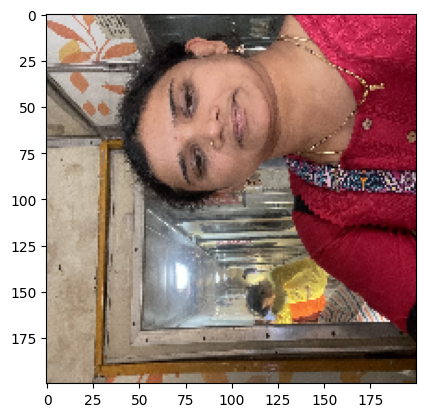

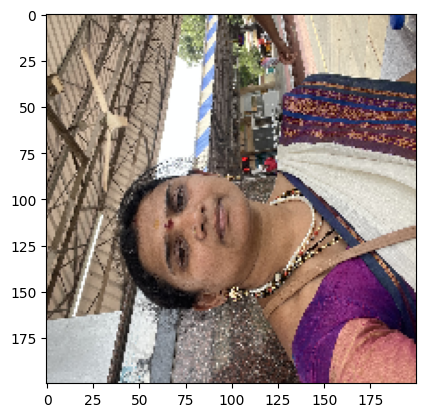

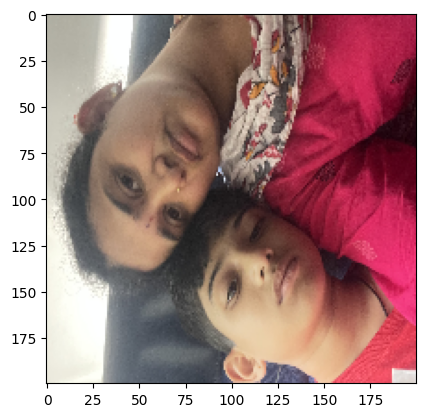

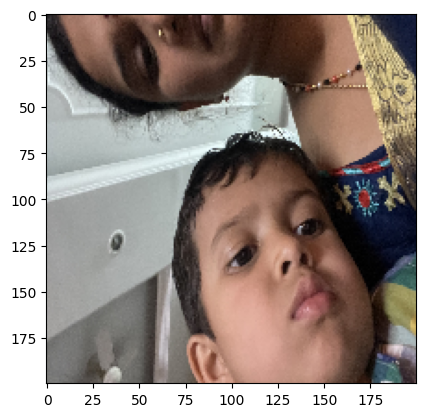

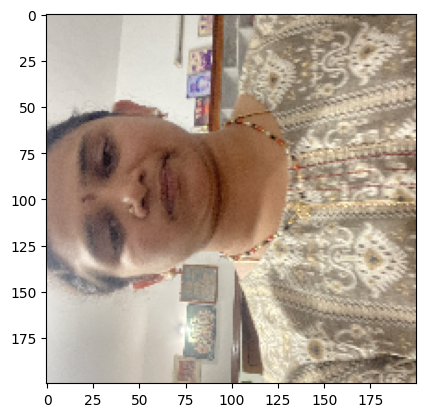

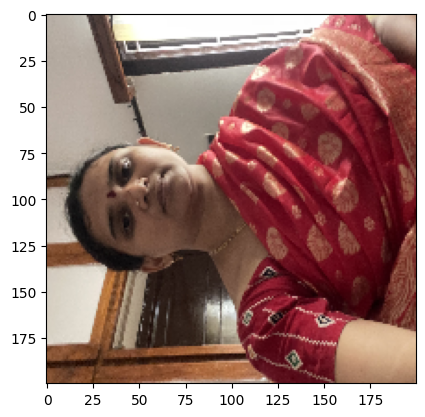

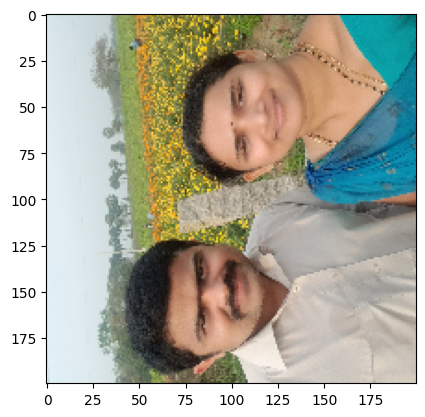

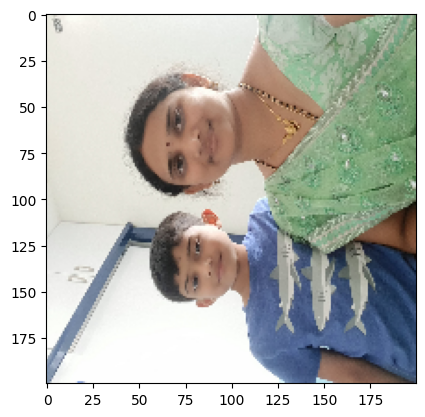

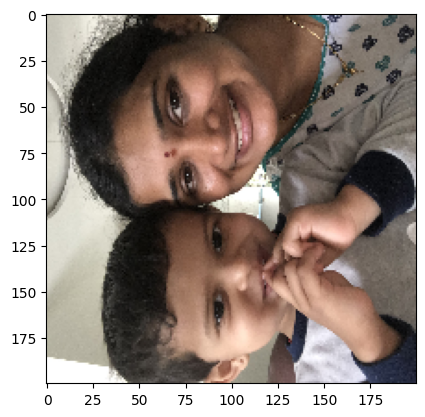

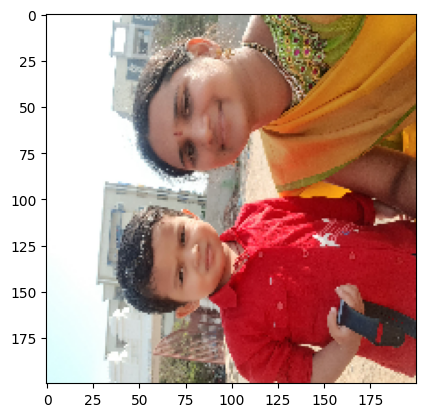

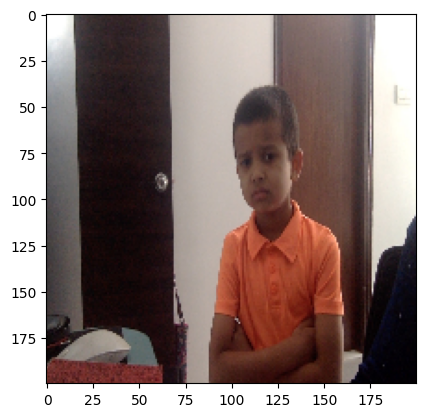

In [35]:
dir_path='/content/drive/MyDrive/Colab Notebooks/CNN-Happy or sad/testing'
for i in os.listdir(dir_path):
  img= image.load_img(dir_path+ '//' +i, target_size=(200,200))
  plt.imshow(img)
  plt.show()

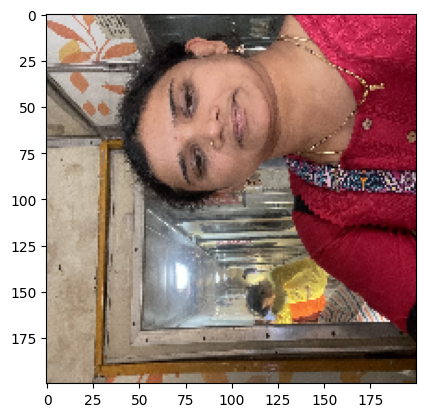

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
im happy


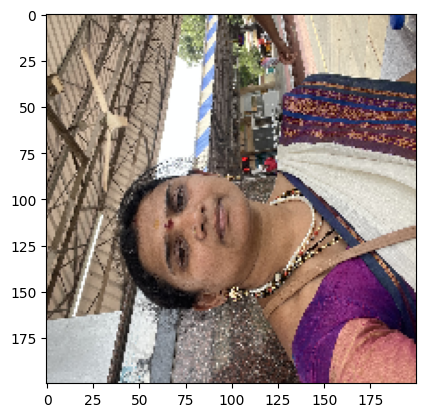

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
im happy


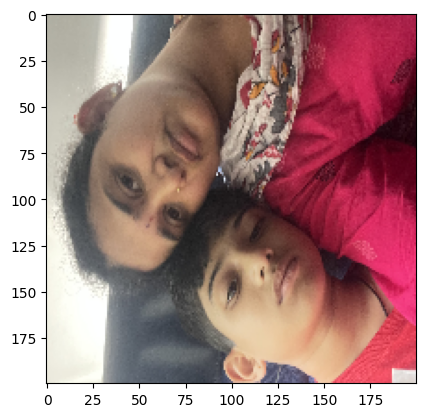

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
im happy


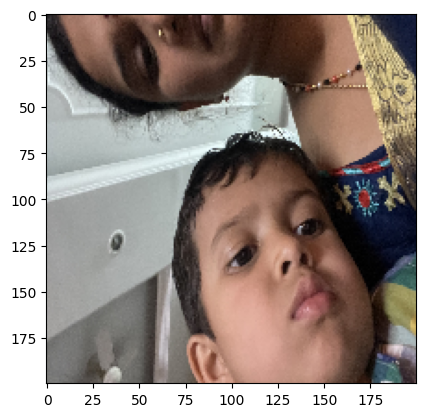

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
im happy


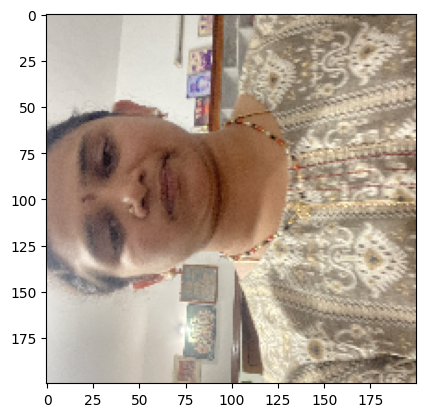

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
im happy


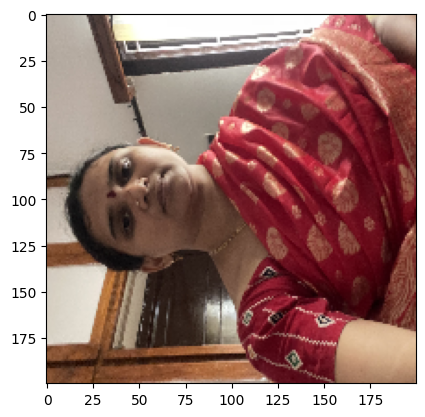

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
im happy


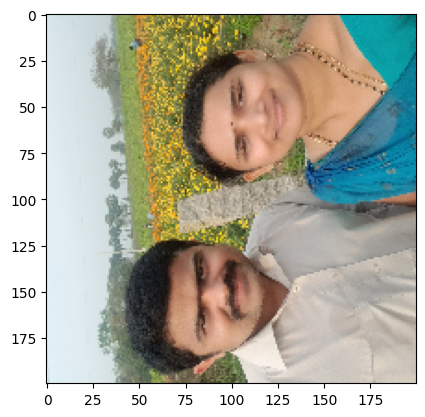

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
im happy


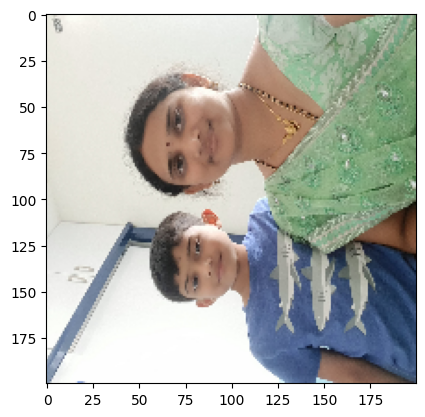

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
i am not happy


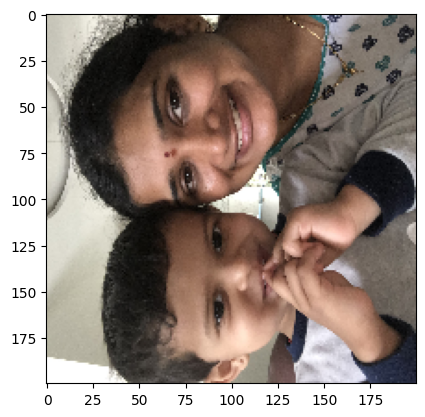

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
im happy


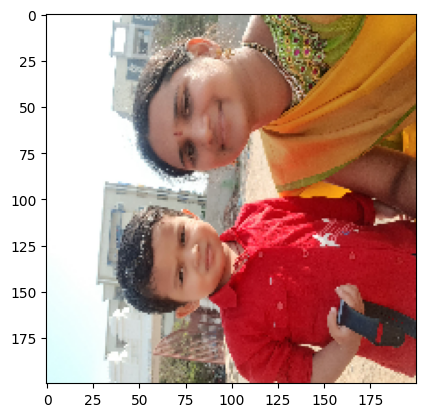

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
im happy


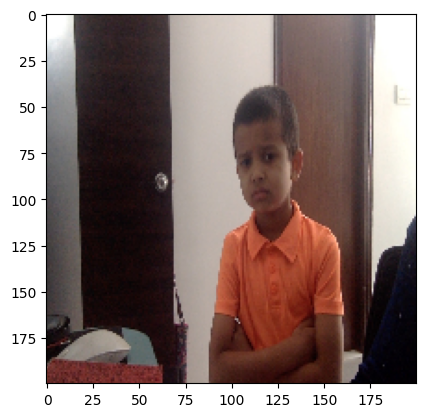

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
im happy


In [36]:
dir_path=r'/content/drive/MyDrive/Colab Notebooks/CNN-Happy or sad/testing'
for i in os.listdir(dir_path):
  img= image.load_img(dir_path+ '//'+i, target_size=(200,200))
  plt.imshow(img)
  plt.show()

  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])

  val=model.predict(images)
  if val == 0:
    print("i am not happy")
  else:
    print("im happy")


In [18]:
import gradio as gr
from PIL import Image
import numpy as np

def predict_mood(image):
    # Resize the image to (200, 200) as expected by the model
    img = image.resize((200, 200))
    # Convert the image to a numpy array
    x = np.array(img)
    # Expand dimensions to create a batch of 1 image
    x = np.expand_dims(x, axis=0)
    # Normalize the image (if the model was trained with normalized inputs)
    # The model was trained with rescale=1/200, so we should apply the same scaling here.
    x = x / 200.0
    # Make prediction
    val = model.predict(x)[0][0]
    # Interpret the prediction
    if val < 0.5:
        return 'Happy'
    else:
        return 'Not Happy'

In [37]:
interface=gr.Interface(fn=predict_mood,
              inputs=gr.Image(type="pil", label="upload an image"),
              outputs=gr.Text(label="Predicted mood"),
              title=" mood classification happy not happy",
              description="upload an. image to classify if the person is happy or not happy.")
interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://549e0839c2e3ab7e3a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
